link dataset: https://drive.google.com/file/d/1XlauDnPFxWaIcF0IzgrznvWU-q0oZ84C/view?usp=sharing

### **Teknik KMeans, Algomerative/Hirarki, DBSCAN**

# Import

In [ ]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Rename nama kolom

In [ ]:
#rename nama kolom
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Melihat Plot Awal

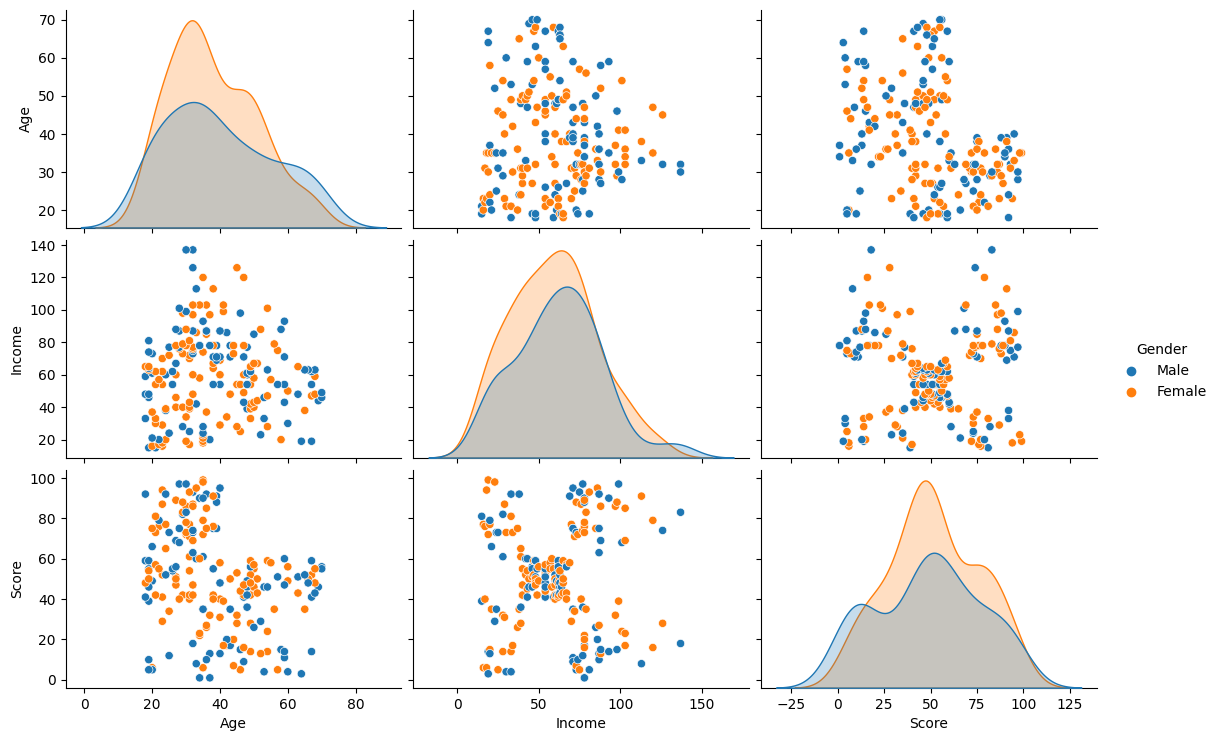

In [ ]:
# Let's see our data in a detailed way with pairplot
# Kayak scatterplot, tp ini langsung bisa melihat semua variabel
X = df.drop(['CustomerID', 'Gender'], axis=1) # Menghilangkan variabel # Axis=1 adalah kolom
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5) # Di group by berdasarkan gender # Aspect=rasio tampilan plot 1.5=1 banding 0.5
plt.show()


- age dan income tidak ada pola, jadi gender tidak ada pengaruh berarti
- score dan income pola ngumpul ditengah, jadi score tengah income nya agak tengah (masuk akal)
- overall plot menyebar jadi variabel gender tidak ada pengaruh berarti

# Cari Tahu Jumlah Cluster yang Cocok

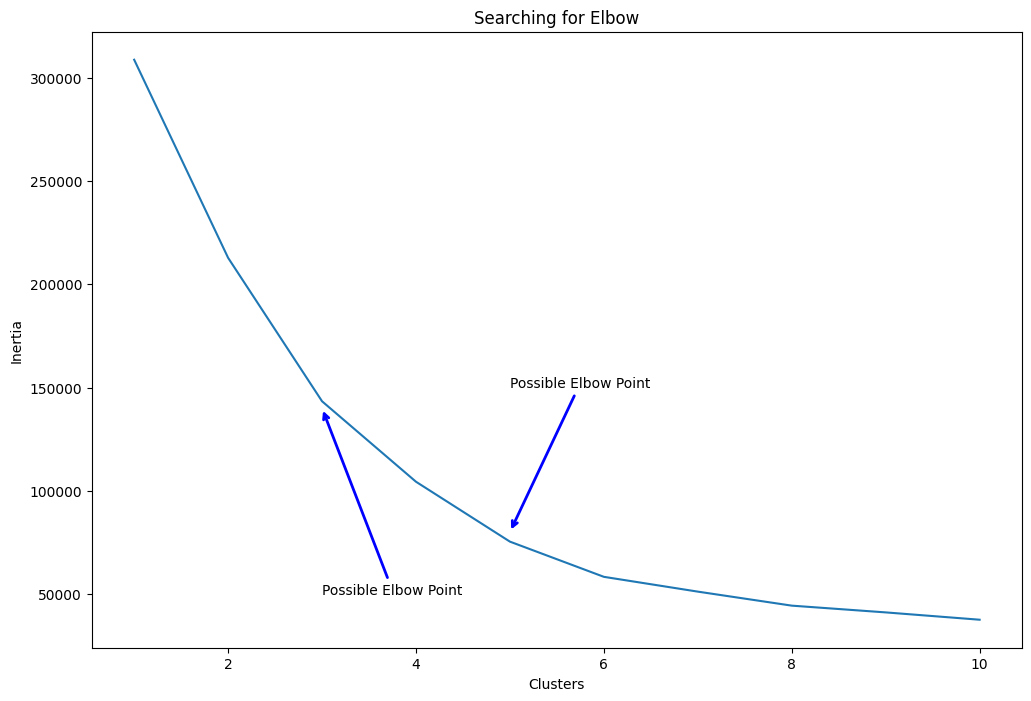

In [ ]:
# Elbow
# Untuk tahu kira2 jumlah k (cluster) yang cocok untuk data kita

from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11): # range nya 1 sampai 10 (looping)
    km = KMeans(n_clusters=i).fit(X) # X adalah dataframe yang udh drop customer id dan gender
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8)) # perbandingan rasio tampilan
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax) # ax=axis, size plot
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

- bikin plot menggunakan inertia
- melihat titik optimumnya jika udah landai
- semakin kecil inertia maka semakin kedekatan/variance udah mirip2
- biasanya mulai dari 2
- yang dicari jarak inertia dari setiap clusternya paling kecil
- kalo jarak udah kecil/landai, maka   titik patahnya adalah cluster yang optimal
- di 3 udah agak sempit jaraknya dan landai
- di 5 juga lebih landai lagi
- di 6 juga lebih landai lagi tapi patahannya kurang terlihat


# KMeans

ditentukan centroid baru ditentukan anggota setiap cluster2nya

Sudah cukup oke sebarannya untuk data yang cukup banyak tapi harus eksplor jumlah cluster dan variabel2nya untuk menentukan segmentasi. Supaya bisa melihat perbedaan tiap clusternya. Kalo ga menjelaskan, harus ganti variabel.

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X) # dataframe X

In [ ]:
# Memasukkan cluster km3 ke dataframe
# Label 0 1 2
# Tiap ngerun antara customer dan labels akan beda, tapi overall customer di tiap cluster akan sama aja

X['Labels'] = km3.labels_
X

,Age,Income,Score,Labels
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


Setelah dicluster, explorasi data dengan melihat plot dari berbagai pasangan variabel

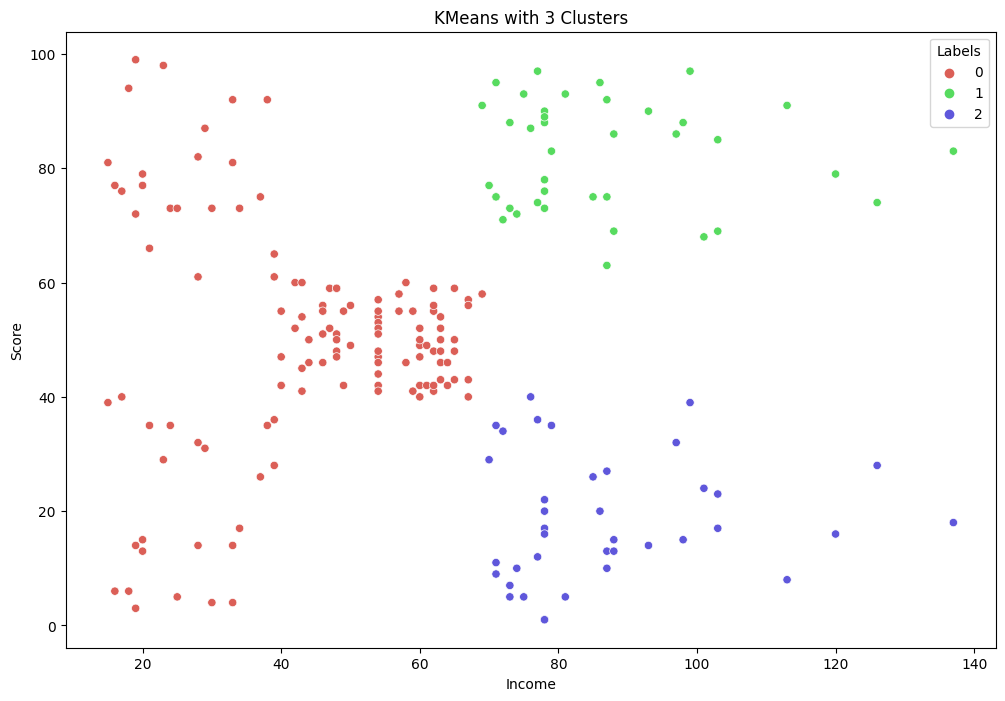

In [ ]:
# Bikin scatterplot
# Tentuin x, y, dan hue/groupby (berdasarkan labels cluster) plotnya
plt.figure(figsize=(12, 8)) # Size tampilan

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

# Hasilnya mirip dengan plot awal antara score dan income

segmentasi :
- cluster 0/merah = income cenderung rendah, score bermacam macam
- cluster 1/hijau =  income besar, score besar
- cluster 2/biru = income besar, score kecil
notes : score=spending
- kalo ngerasa mau diperbanyak cluster nya juga boleh

In [ ]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
X

,Age,Income,Score,Labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


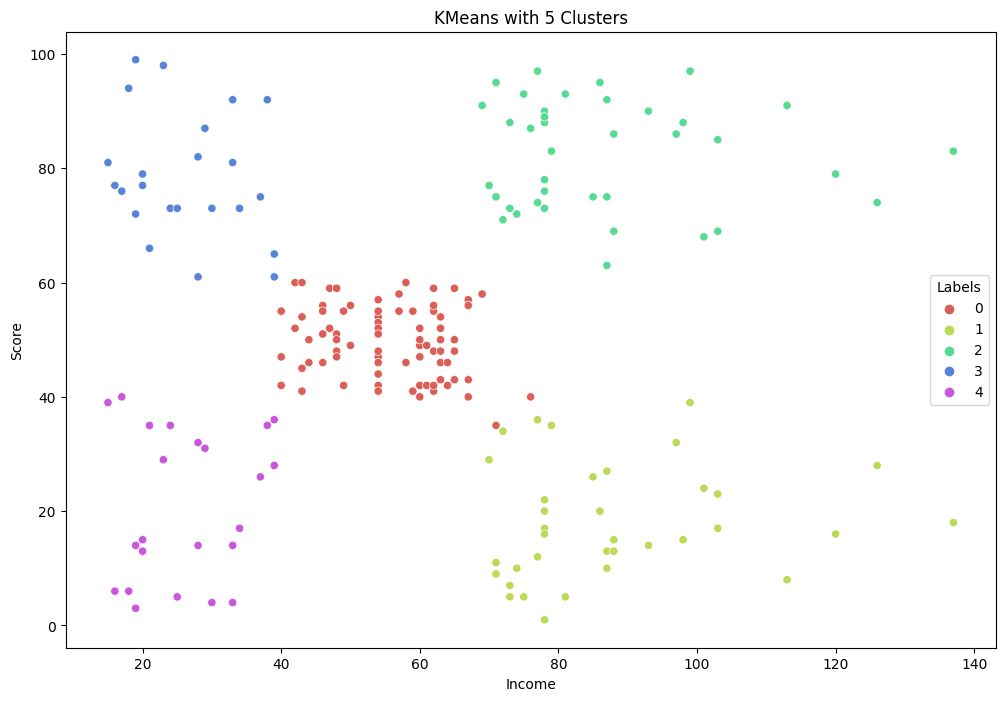

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

masih ada beberapa plot yang kurang tepat, tapi ini sudah lebih terbagi clusternya

Segementasi:
- Label 3 is low income and high spending
- Label 0 is mid income and mid spending
- Label 2 is high income and high spending
- Label 1 is high income and low spending
- Label 4 is low income and low spending

insight:
- label 1, udah high income diboost untuk spending more
- label 2, bisa dikasih royalty/membership

## Kalau tidak bisa menemukan variabel yang relevan untuk menentukan segmentasi

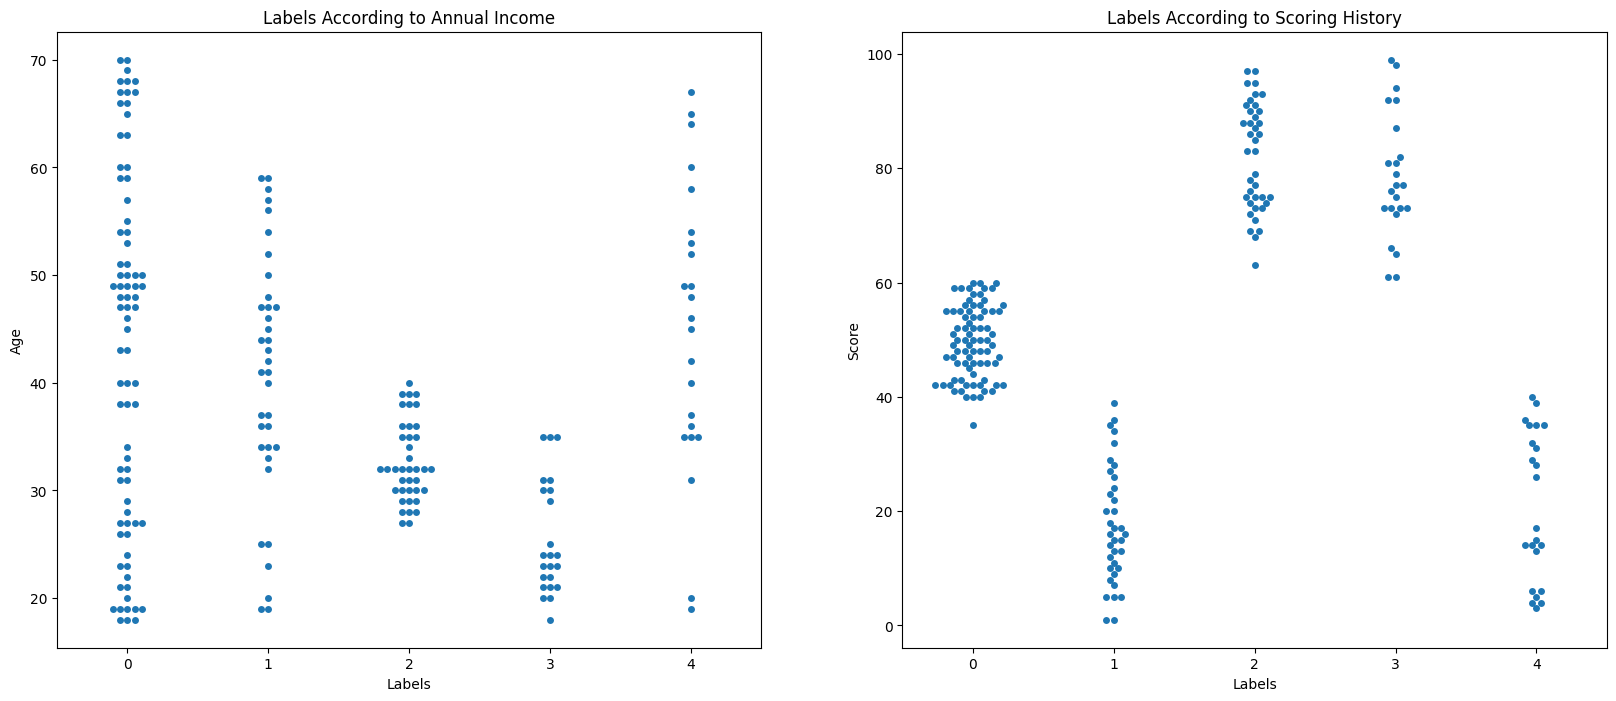

In [ ]:
# Melihat jumlah anggota cluster dan sebaran tiap cluster
# Setiap 1 variabel, antara Labels dan 1 variabel lain

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

- Kalo banyak plot yang mengumpul berarti ideal untuk dijadikan variabel sbg interpretasi segmentasi.
- Misal ada 10 variabel, 8 berpola, 2 tidak berpola. Yang gak berpola bisa dihapus, dan sisa 8 bisa diulang clusternya krn siapa tau lebih presisi

# Algomerative / Hirarki

Tidak ditentukan centroid baru ditentukan anggota setiap cluster2nya. Jadi hanya mencari yang dekat dulu, dari yang dekat baru dibagi clusternya

Lebih lama pengecekannya karna harus liat kedekatan individu datanya

Lebih leluasa untuk nentuin cluster

Bisa lihat kedekatan tiap data individu


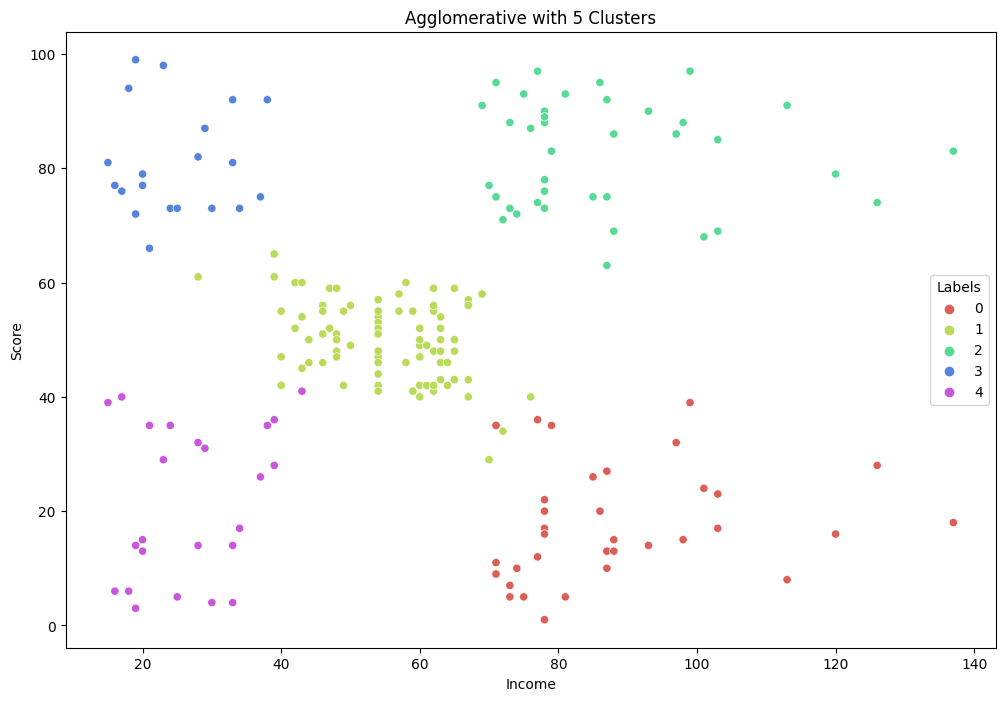

In [ ]:
# Pakai scatterplot

from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X) # linkage = penentuan jarak kedekatannya, bisa average bisa complete

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)

In [ ]:
Z = hierarchy.linkage(dist, 'average') # bisa average bisa complete

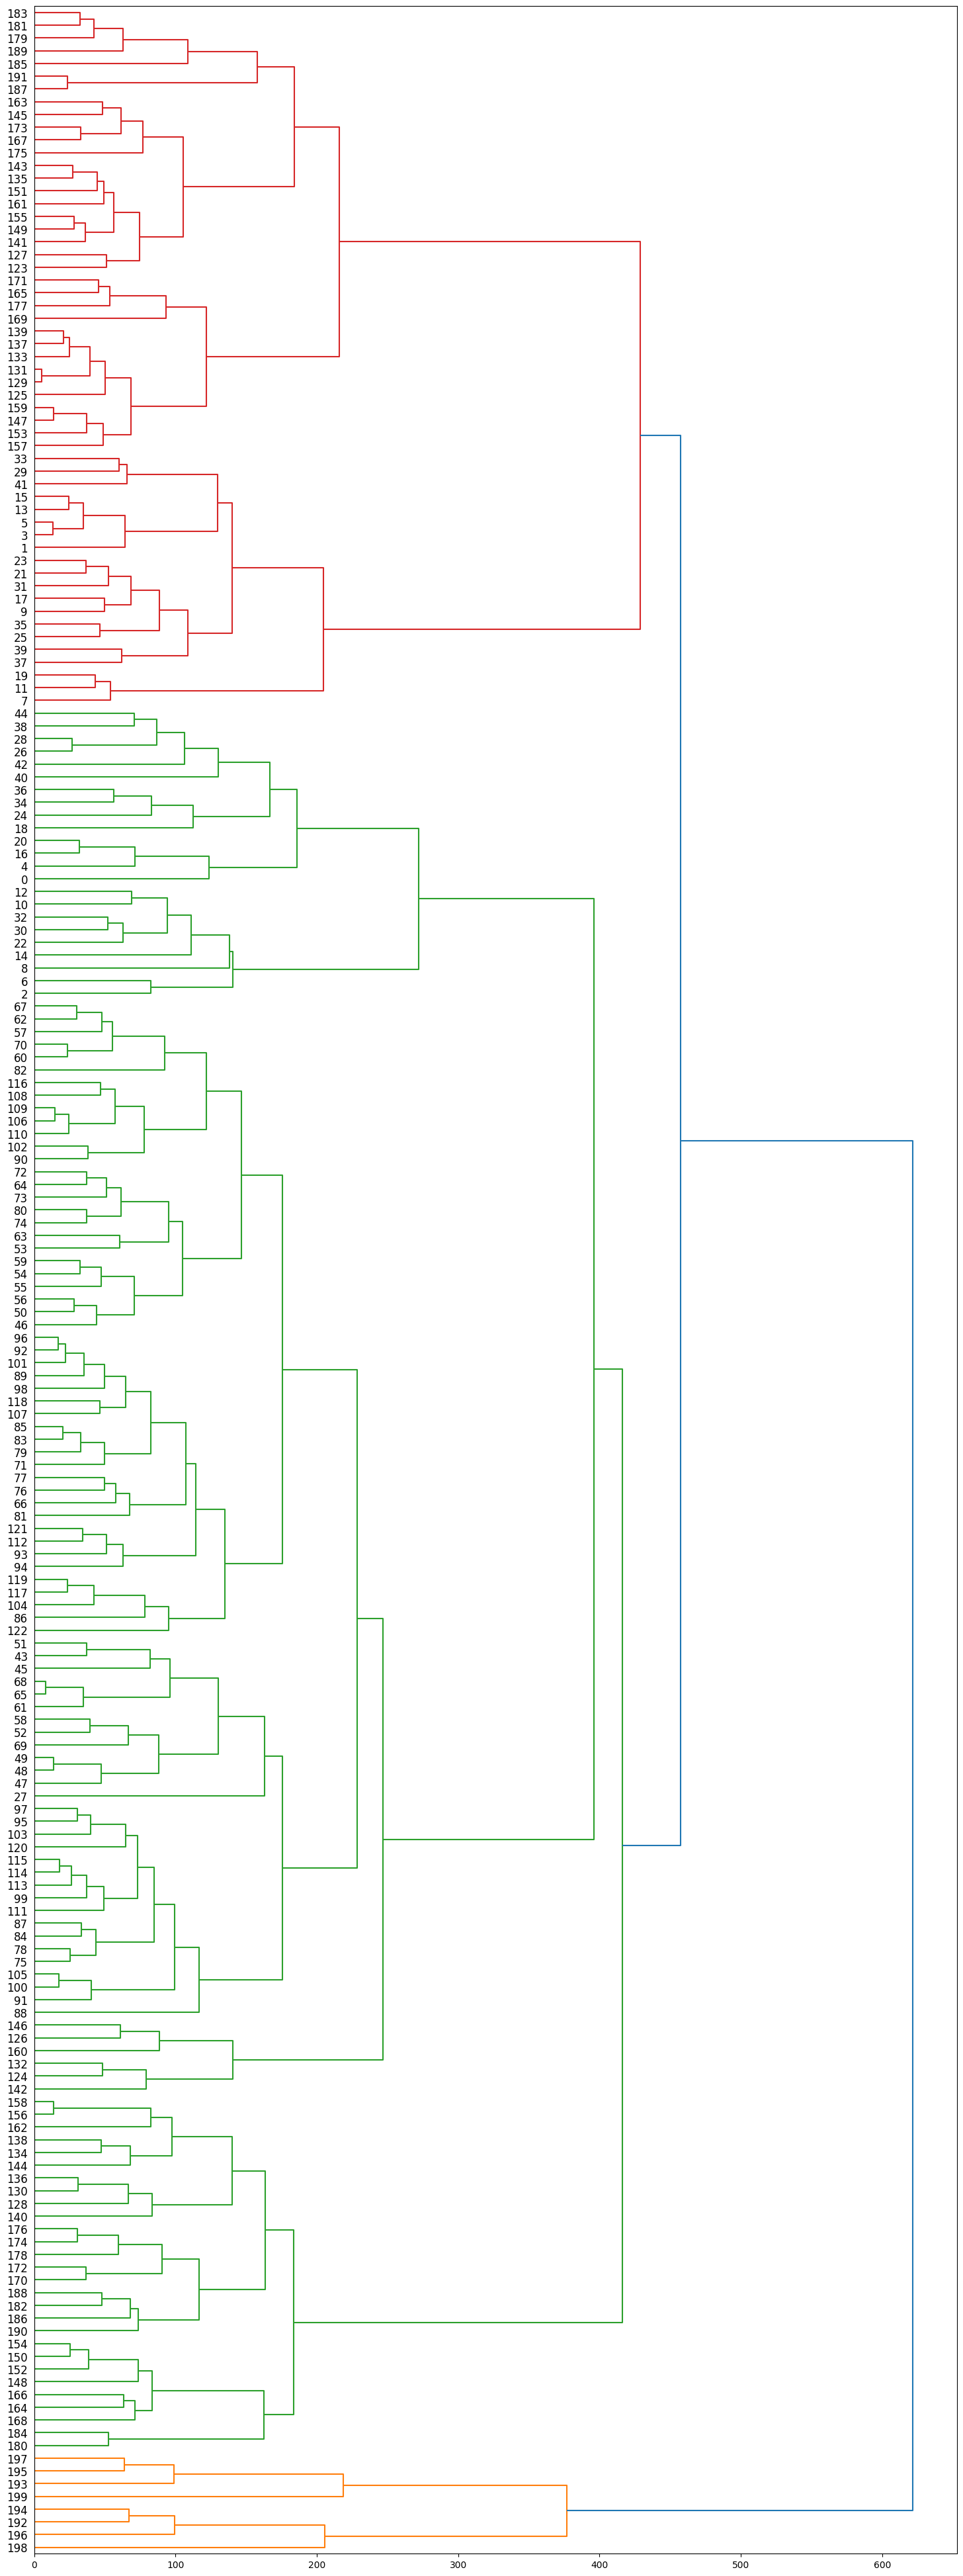

In [ ]:
# Bagan dari setiap data customer id
# Bisa dilihat data apa dekat dengan data apa

plt.figure(figsize=(1, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

Cara menentukan jumlah cluster secara manual:
- cari yang jarak bagannya paling panjang / jarak bagannya yg jauh. Cluster ditentukan berdasarkan titik potong bagan tsb

# DBSCAN

- pake epsilon dan minimal sample
- basisnya random
- makin besar minimal sample, outlier makin tinggi karena kepadatannya harus lebih ketat. minimal sample rendah, akan lebih longgar untuk mengkriteriakan datanya masuk ke kluster apa
- kurang dipakai dikerjaan
- yang mines adalah outlier
- mengelompokkan outlier berdasarkan cluster khusus
- bisa jadi banyak data yg kedeteksi sebagai outlier krn dikira tidak punya kepadatan/kedekatan data dengan yg lain pdhl kalo terliat harusnya masuk
- lebih enak data yang variansi nya tidak terlalu beragam


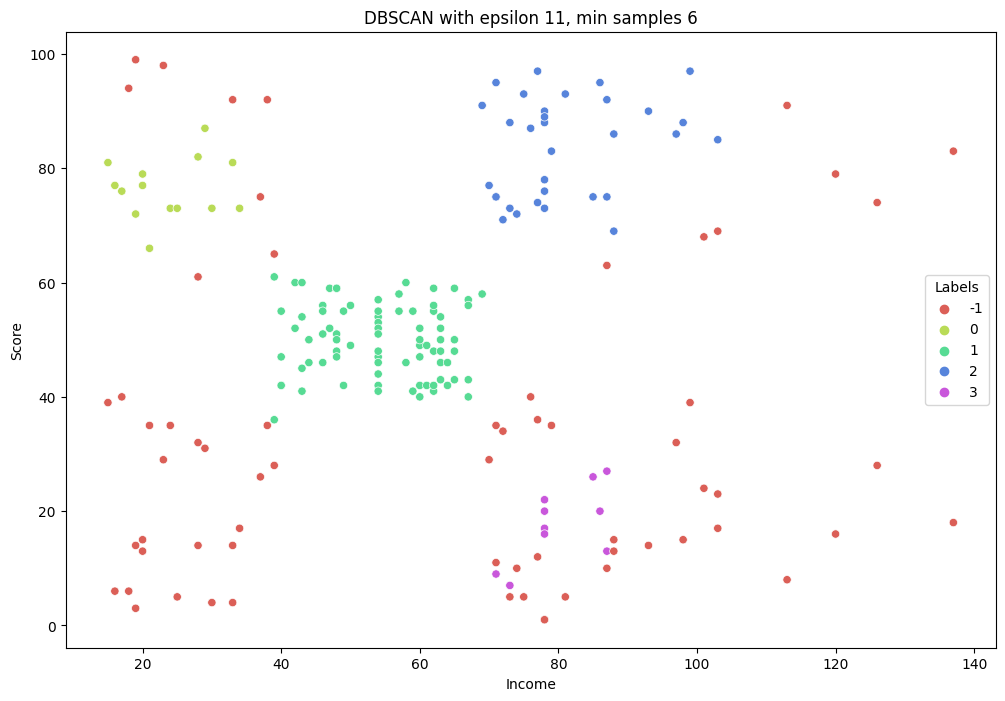

In [ ]:
# Kalo parameter diubah(eps) akan berubah juga persebarannya

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X) #paramater bisa diubah ubah #min_samples = berapa sample yang mau dicek kepadatan datanya

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()